# Chapter 1 - Thinking in Algorithms

## Understand the Problem
First step in designing an algorithm is to understand the poblem to be solved.

**Example:** Given a set of points P in a 2D plane, find the convex hull.
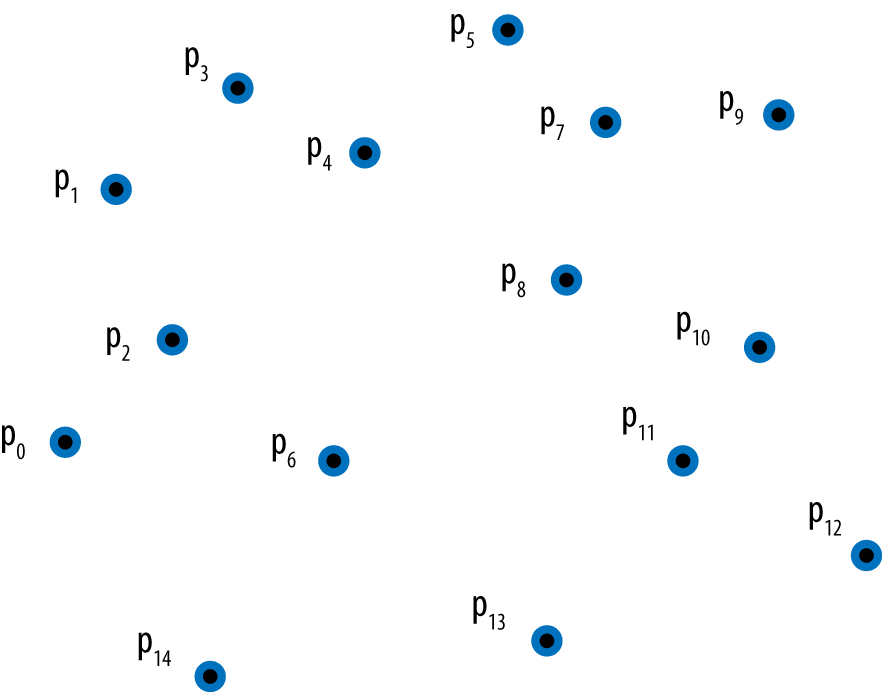
- Given a convex hull for P, any line segment drawn between any two points in P lies totally within the hull.
- Assume we order the points in the hull clockwise. THus, hulled is formed by clockwise ordering of $h$ points $L_0, L_1, L_2, ..., L_{h-1}$ as shown:
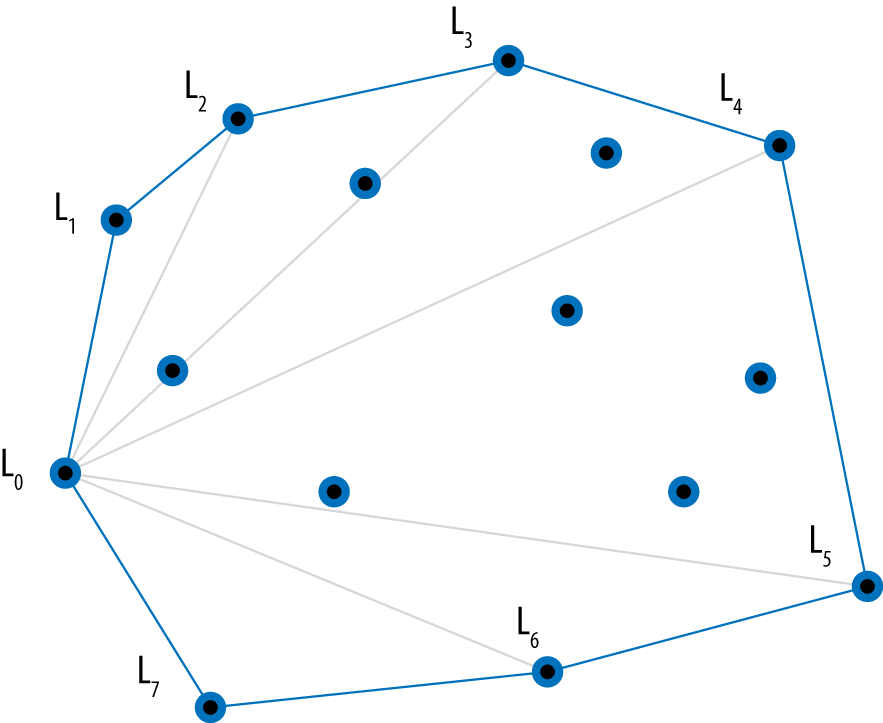
- Each sequence of three hull points $L_i, L_{i+1}, L_{i+2}$ creates a right turn.
We need to come up with an *algorithm* for this. 

Interestingly, this doesn't really get classified into existing algorithmic domains. 
- There doesn't seem to be any linear sorting of the points from left to right, Although, points are ordered in clockwise fashion around the hull.
- There is no obvious search being performed, although you can identify a line segment on the hull as remaining $n-2$ points are "to the right" of that line segment in the plane.

## Naïve Solution
Clearly, a hull consists for any collection of three or more points. 

Consider the following idea:
- Select any 3 points from orignal collection and form a triangle. 
- If any remaining $n-3$ points lie inside, they can't be part of hull.

**Best, Average, Worst:** $O(n^4)$
**Psuedocode:**

    slowhull (P)
        foreach p0 in P do
            foreach p1 in {P-p0} do
                foreach p2 in {P-p0-p1} do
                    foreach p2 in {P-p0-p1-p2} do
                        if p3 is contained within triangle(p0, p1, p2) then
                            mark p3 as internal
        create an array A with all non-internal points in P
        determine leftmost point, left, in A
        sort A by angle formed with vertical line through left
        return A
        
- Points $p0, p1, p2$ form a rectangle.
- Points *Not marked* as internal are on convex hull
- These angles (in degrees) range from -90 to 90.


## Intellegent Approaches

### Greedy
Way to construct the convex hull one point ar a time:
1. Remove from P it's lowest point, *low*, which must be part of the hull.
2. Sort the remaining $n-1$ points in descending order, by angle formed in relation to vertical line passing through low. These angle range from 90 Degrees for those on left to -90 Degrees for those on right. $p_{n-2}$ is the rightmost point and $p_0$ leftmost.
3. Start with partial convex hull formed from three points in this order, each of points $p_1$ to $p_{n-2}$. If last three points of the partial hull ever turn left, the hull contains an incorrect point, that must be removed.
4. Once all points are considered, the partial hull completes.
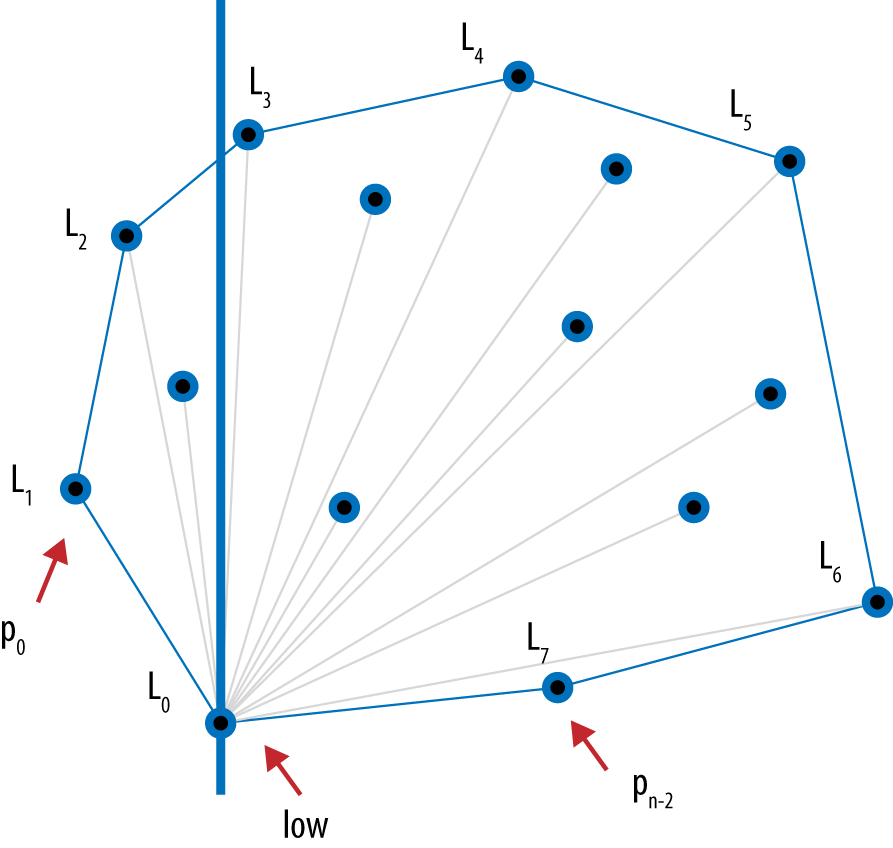

### Divide and Conquer
1. We can divide the problem in half if we first sort all points, $P$ LTR by $x$ coordnate (then $y$ in ties).
2. From this, compute upper *partial* convex hull by considering points in order LTR from $p_0$ to $p_{n-1}$ clockwise. Then lower *partial* convex hull by processing same points RTL from $p_{n-1}$ to $p_0$ again in clockwise direction. 
3. Merge both *partial* hulls to produce final convex hull.

**Convex Hull Scan** Computes partial convex hulls and merges them together to find final convex hull.

### Parallel
For a number of processors, partition inital points by $x$ coordinate and have each processor compute the convex hull for its subset of points, then *stich* together result by merging of neighboring partial solutions. 
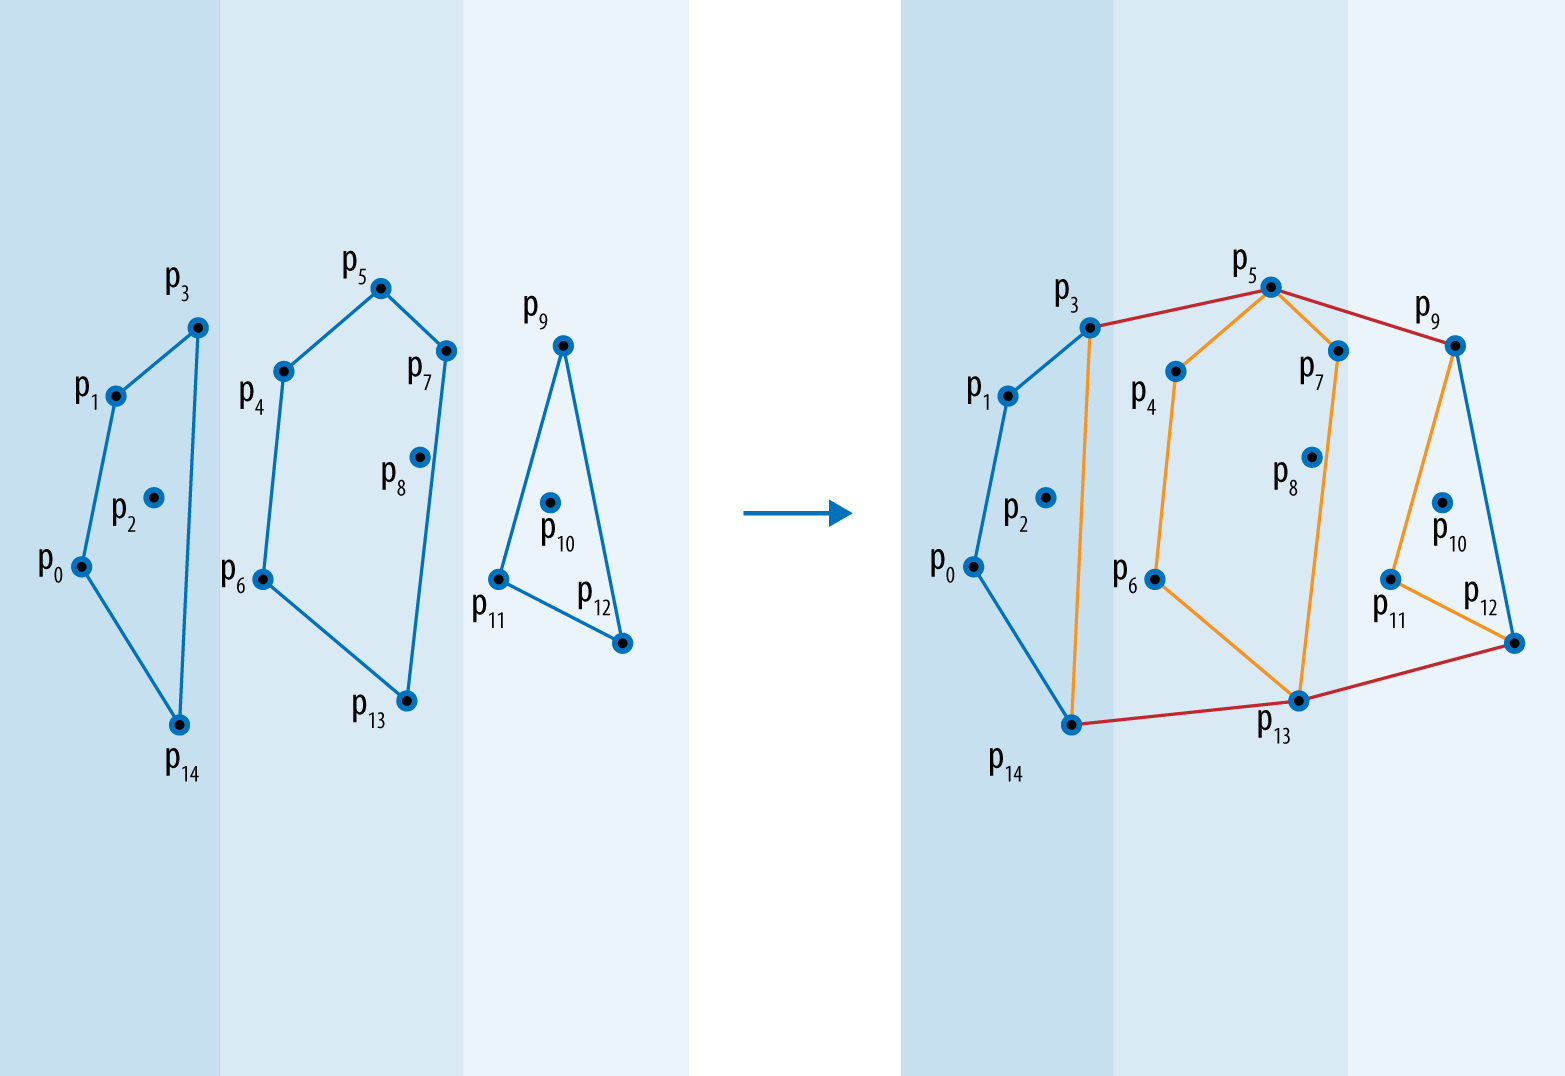

A parallel approach divides the problems among a number of processors to speed up the overall solution. 

### Approximation

Even with these improvements, there is still a lower bound performance for computing the convex hull that cannot be beaten. However, instead of computing exact answer, an approximate answer, if satisfactory, can be computed quickly whose *error can be accurately detemined.*

The *Bentley-Faust-Preparata* algorithm constructs an approximate convex hull by partitioning points into vertical strips (Bentley et al., 1982). Within each strip, the maximum and minimum points (based on $y$ coordinate) are identified:
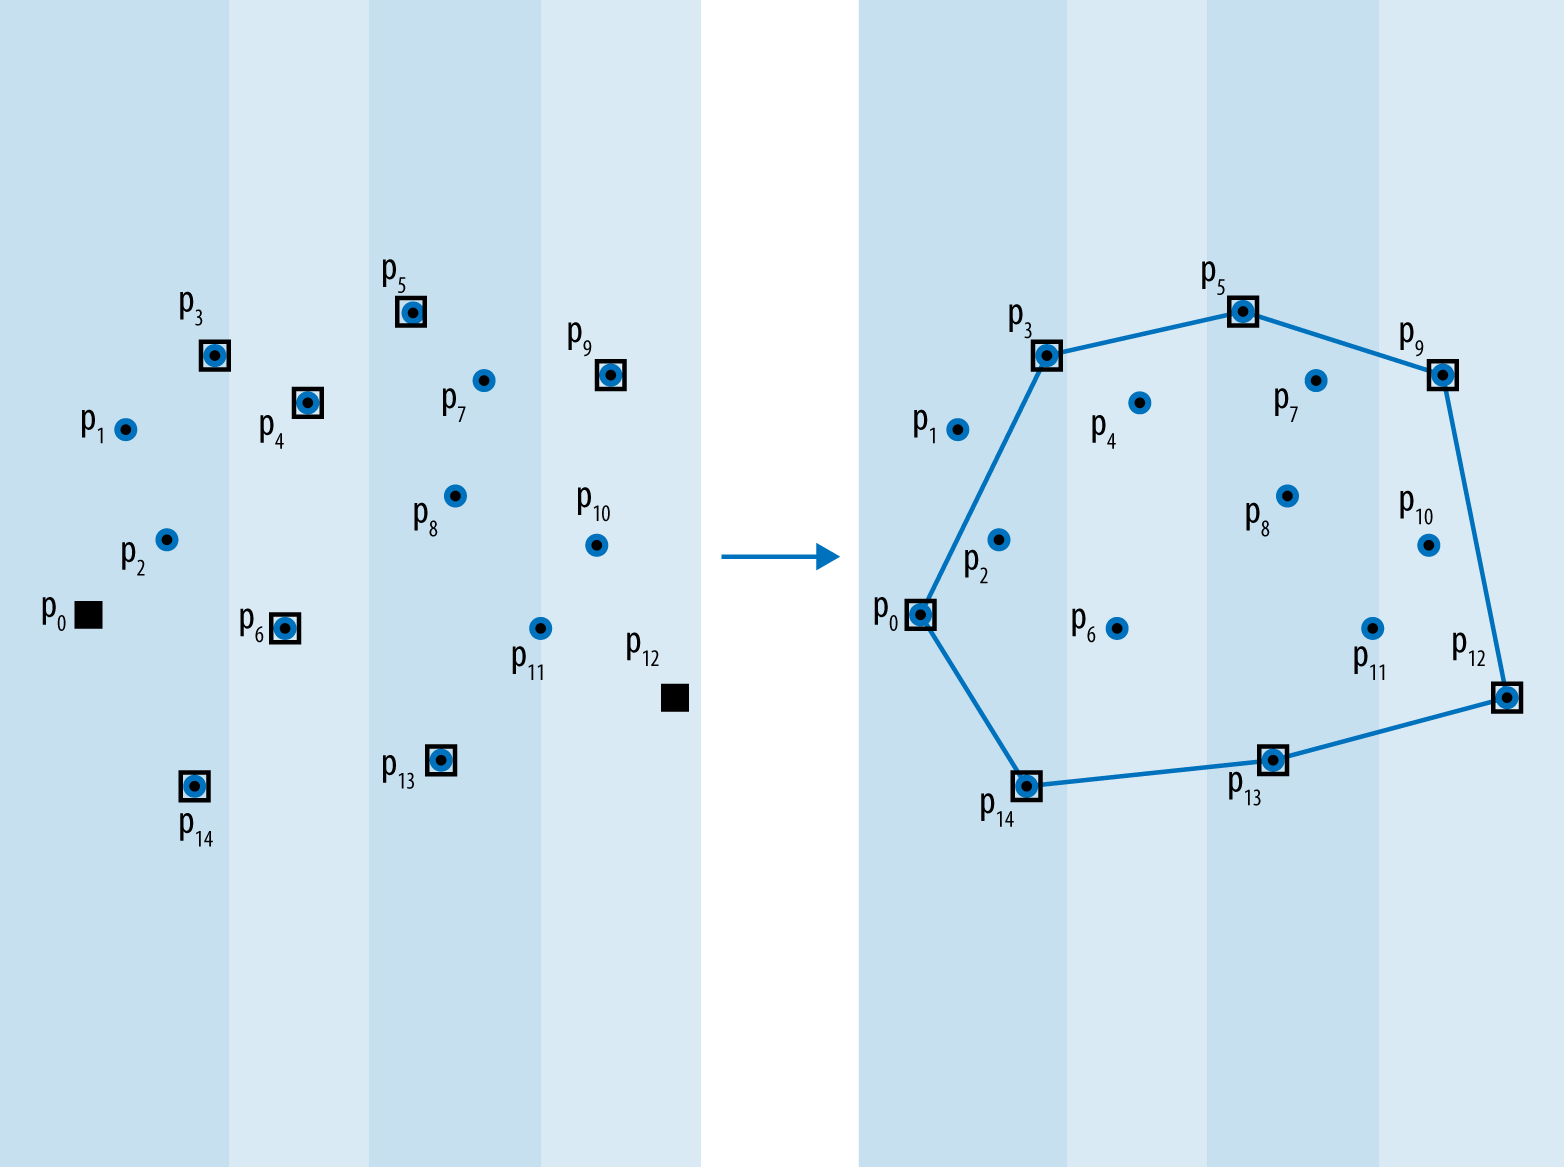

Together with leftmost and rightmost points, these extreme points are stiched together to form approximate convex hull. 

In doing so, a point may fell outside the actual hull ($p_1$ in figure).

## Generalisation
Its possible to solve a more general problem whose solution can be readily converted to solve a specific problem.

*Voronoi diagram (Preparata and Shamos, 1993)* is a geonmetric structure that divides a set of points in the input set $P$. Each region $R_i$ is the set of the points ($x$, $y$) in the plane closer to the anchor point $p_i$, than any other point in $P$.    
Once diagram is computed, these regions are semi infinite, and you can observe that these match directly to the points on the convex hull.

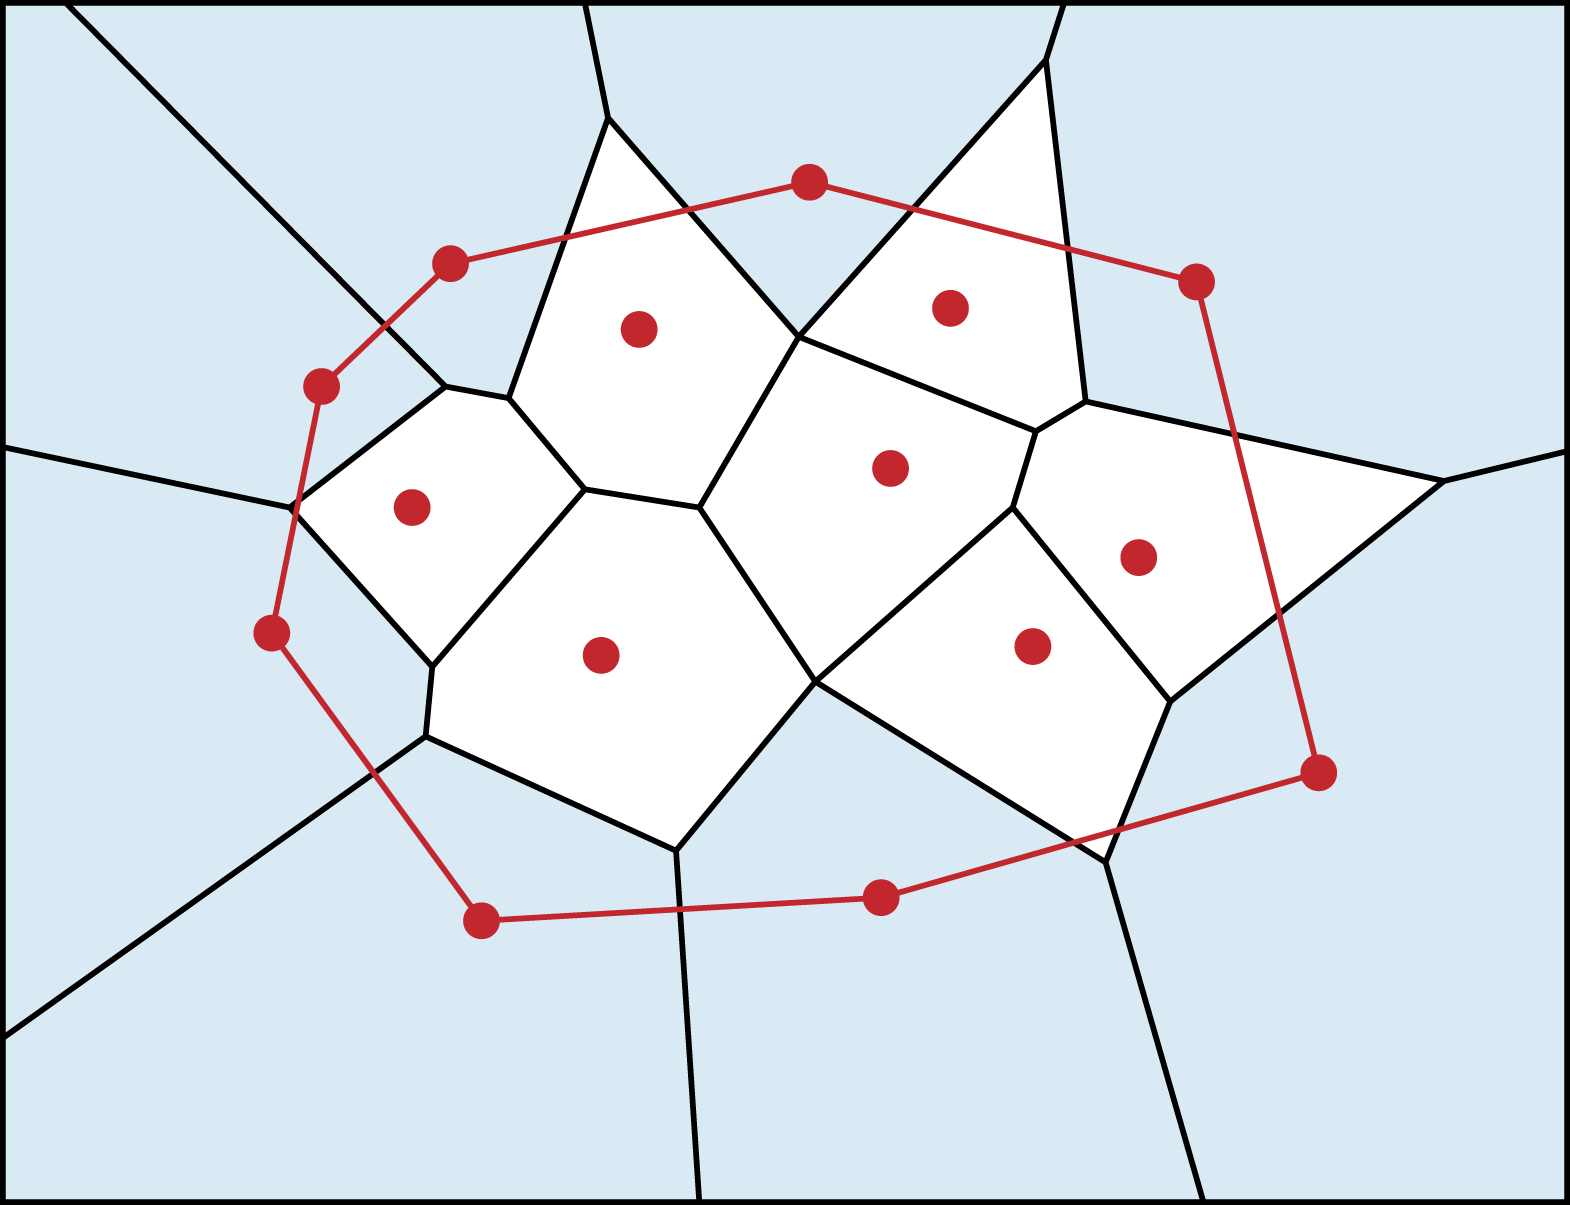

This observation leads to following algorithm:
1. Compute Voronoi Diagram for P.
2. Initialize the hull with the lowest point, *low* in P and start at its associated region.
3. Visit neighboring region that shares an infinitely long side and add that to the region's anchor point to the hull.
4. Continue adding points until the orignal region is encountered. 


## Summary
- Efficient algorithm is often not at all obvious to discover.
- Very different algorithms may be the best ones to choose for different datasets, processing enviornments (ex. where you can exploit parallelism), goals, etc.


## References
- Bentley, J. L., F. Preparata, and M. Faust, “Approximation algorithms for convex hulls,” Communications of the ACM, 25(1): 64–68, 1982, http://doi.acm.org/10.1145/358315.358392.
- Preparata, F. and M. Shamos, Computational Geometry: An Introduction, Springer, 1993.